In [431]:
import random
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb

In [432]:
def exp_ign(gp, fp):
    return - gp * math.log(fp, 2) - (1-gp) * math.log(1-fp, 2)

def simple_log_score(outcome, forecast_prob):
    return -math.log(forecast_prob, 2) if outcome else -math.log(1 - forecast_prob, 2)

def log_score_538(outcome, forecast_prob):
    return 25 * (1 + math.log(max(forecast_prob, 1 / 14640), 2)) if outcome else \
        25 * (1 + math.log(max(1 - forecast_prob, 1 / 14640), 2)) 


In [433]:
def simulate_person(governing_prob, forecast_prob, N):
    log_scores = { 'simple': [], '538 pts': []}
    for _ in range(N):
        outcome = random.random() < governing_prob
        log_scores['simple'].append(simple_log_score(outcome, forecast_prob))
        log_scores['538 pts'].append(log_score_538(outcome, forecast_prob))
    # For each N, calculate the average log score up to that N for each key in log_scores
    averages = {key: np.cumsum(scores) / np.arange(1, N+1) for key, scores in log_scores.items()}
    return averages

In [453]:
# 16 games
# What's my exp(IGN)?
# It's a function of N, p_me, p_gov, and my RAP [default to median]
# I want a certain P(beating p_gov)

N = 32
gdp = [np.random.uniform(.80, .99) for _ in range(N)]
gdp_str = 'random.uniform(.80, .99)'
p_me_list = [p + 0.001 for p in gdp]

def world_me_vs_demon(N, gdp, p_me_list):
  my_log_scores = []
  demon_log_scores = []

  outcomes = [random.random() < p_gov for p_gov in gdp]

  my_log_scores = [log_score_538(outcome, p_me) for outcome, p_me in zip(outcomes, p_me_list)]
  demon_log_scores = [log_score_538(outcome, p_gov) for outcome, p_gov in zip(outcomes, gdp)]

  # For each N, calculate the average log score up to that N for IGN points
  my_averages = np.cumsum(my_log_scores) / np.arange(1, N+1)
  demon_averages = np.cumsum(demon_log_scores) / np.arange(1, N+1)
  # Did I win? For each of the fp arrays, is my final average log pts > demon's final average log pts?
  winner = my_averages[-1] > demon_averages[-1]
  return winner, my_averages, demon_averages

In [435]:
world_me_vs_demon(N, gdp)

(True,
 array([20.69491978, 22.37150524, 22.1451023 , 21.90987439, 21.02958524,
        21.52262123, 13.57881839, 14.64052067,  8.74992835,  9.99853361,
        11.12934322, 12.14786793, 12.63407565, 13.0532962 , 13.64124372,
        14.06834414, 14.31952715, 14.68297595, 15.08642669, 15.45923581,
        15.77543959, 16.01012499, 16.26576253, 16.34194099, 16.56088794,
        16.64101141, 16.70452515, 16.91357901, 17.00715578, 17.23866679,
        17.31467537, 17.40830078]),
 array([20.65425695, 22.33264833, 22.1060133 , 21.87053454, 20.98922914,
        21.48280564, 13.57113575, 14.62890609,  8.76276356, 10.0060796 ,
        11.13268103, 12.14777978, 12.63066709, 13.04704453, 13.63278511,
        14.05785719, 14.30710356, 14.66899393, 15.07113638, 15.44277846,
        15.7579036 , 15.99155022, 16.24628505, 16.32145403, 16.53964373,
        16.61892877, 16.68165339, 16.89014501, 16.98308553, 17.21416057,
        17.28960732, 17.38273177]))

In [436]:
winners = []
numworlds = 2048

for i in range(numworlds):
  winners.append(world_me_vs_demon(N, gdp)[0])

winners

[True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 

In [437]:
# Sum each column
percent_mw_wins = sum(winners)/numworlds

percent_mw_wins

0.53564453125

- Pick N_season U(1,128)
- Do 2048 many worlds with eps=0.001, GDP U(.8, .99)

Plot x=N, y=percentage that wins
One world, one point.

Plot these in blue.
Then repeat with eps = 0.005 and plot these in orange

In [464]:
numworlds = 8192

# Dictionary to hold percentage of wins for each value of N
percent_mw_wins_blue = {}
percent_mw_wins_orange = {}

# Blue
blue = [p + 0.001 for p in gdp]
for i in range(1, 128): # N games
  winners = []
  for j in range(numworlds):
    winners.append(world_me_vs_demon(N, gdp, blue)[0])
  percent_mw_wins_blue[i] = sum(winners)/numworlds

# Orange
orange = [p + 0.005 for p in gdp]
for i in range(1, 128): # N games
  winners = []
  for j in range(numworlds):
    winners.append(world_me_vs_demon(N, gdp, orange)[0])
  percent_mw_wins_orange[i] = sum(winners)/numworlds
  

Text(0.5, 1.0, 'U(.8, .99), mw = 8192')

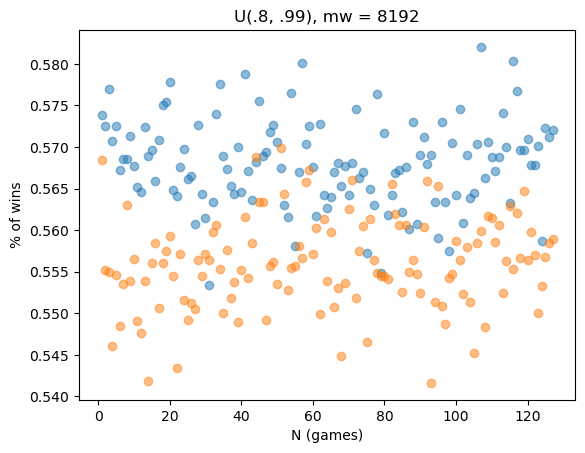

In [465]:
# Plot percent_mw_wins_blue and _orange (keys are X, values are Y)
plt.scatter(list(percent_mw_wins_blue.keys()), list(percent_mw_wins_blue.values()), label='Blue', alpha=0.5)
plt.scatter(list(percent_mw_wins_orange.keys()), list(percent_mw_wins_orange.values()), label='Orange', alpha=0.5)
# X axis label N (games)
plt.xlabel('N (games)')
# Y axis label % of wins
plt.ylabel('% of wins')
# Title U(.8, .99)
plt.title(f'U(.8, .99), mw = {numworlds}')

========

In [439]:
np.cumsum([1,2,3,4]) / np.arange(1, 5)

# Assuming some values for governing_prob, forecast_prob, and num_people
governing_prob = 0.90
forecast_prob = 0.90

In [440]:
N = 500
num_people = 500

medians = {}
means = {}
p92 = {}
p08 = {}

# Simulate num_people and calculate the log scores
log_scores = [simulate_person(governing_prob, forecast_prob, N) for _ in range(num_people)]

# Make a dataframe where columns are repetitions and rows are people
df = pd.DataFrame(log_scores)

# For each column (repetition) in df, get the median, mean, and 90th percentile
column_names = list(df.columns)  # Add more column names/keys here if needed

# Assuming each dictionary in log_scores has the same keys
keys = log_scores[0].keys()

for key in keys:
    # Extract the arrays for the current key from each dictionary in log_scores
    arrays = [person[key] for person in log_scores]

    # Stack these arrays vertically
    stacked_arrays = np.vstack(arrays)

    # Calculate the median across rows (i.e., across all people) for each column
    medians[key] = np.median(stacked_arrays, axis=0)
    means[key] = np.mean(stacked_arrays, axis=0)
    p92[key] = np.quantile(stacked_arrays, 0.92, axis=0)
    p08[key] = np.quantile(stacked_arrays, 0.08, axis=0)


In [441]:
simulate_person(.97, .98, 3)

{'simple': array([0.02914635, 0.02914635, 0.02914635]),
 '538 pts': array([24.27134136, 24.27134136, 24.27134136])}

In [7]:
len(log_scores)

500

In [8]:
# Write df to a csv called "df_N40_R500.csv", no row names
df.to_csv(f"df_N{N+1}_{num_people}worlds_{governing_prob}governing_{forecast_prob}forecast.csv", index=False)

In [9]:
medians

{'simple': array([0.15200309, 0.15200309, 0.15200309, 0.15200309, 0.15200309,
        0.15200309, 0.60484952, 0.54824372, 0.50421698, 0.46899559,
        0.44017809, 0.41616351, 0.39584348, 0.37842631, 0.36333143,
        0.35012341, 0.33846927, 0.50421698, 0.48567941, 0.46899559,
        0.45390071, 0.44017809, 0.42764875, 0.41616351, 0.40559709,
        0.39584348, 0.38681235, 0.49163792, 0.47992637, 0.46899559,
        0.45877003, 0.44918356, 0.44017809, 0.43170236, 0.42371095,
        0.41616351, 0.49469769, 0.48567941, 0.47712361, 0.46899559,
        0.46126407, 0.45390071, 0.44687984, 0.44017809, 0.4337742 ,
        0.42764875, 0.42178394, 0.48220361, 0.47546483, 0.46899559,
        0.46278005, 0.45680357, 0.45105262, 0.44551467, 0.44017809,
        0.43503211, 0.48567941, 0.47992637, 0.47436835, 0.46899559,
        0.463799  , 0.45877003, 0.45390071, 0.44918356, 0.44461156,
        0.44017809, 0.43587697, 0.4783189 , 0.47358969, 0.46899559,
        0.46453091, 0.46019025, 0.4559

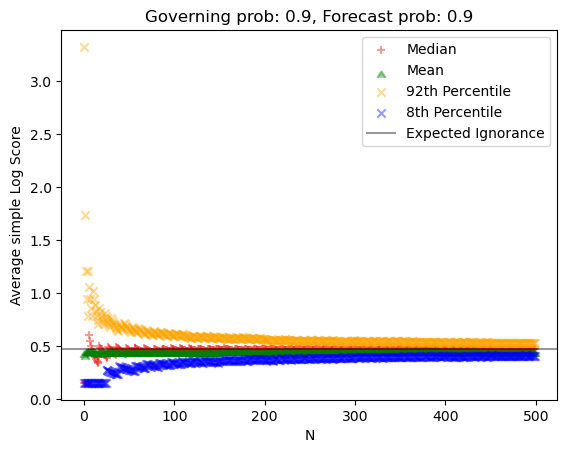

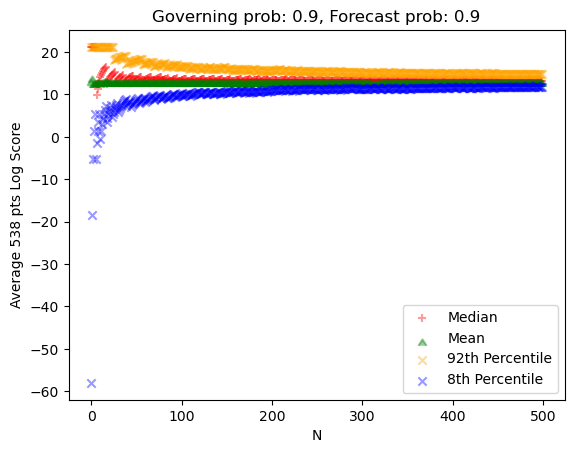

In [10]:
for col in column_names:
    # Create line plots for median, mean, and percentile
    N_values = range(N)
    plt.scatter(N_values, medians[col], color='red', label='Median', marker = '+', alpha = 0.4)
    plt.scatter(N_values, means[col], color='green', label='Mean', marker = 6, alpha = 0.4)
    plt.scatter(N_values, p92[col], color='orange', label='92th Percentile', marker = 'x', alpha = 0.4)
    plt.scatter(N_values, p08[col], color='blue', label='8th Percentile', marker = 'x', alpha = 0.4)

    # If column name is "simple," add horizontal line at exp_ign(governing_prob, forecast_prob)
    if col == 'simple':
        plt.axhline(y=exp_ign(governing_prob, forecast_prob), color='black', label='Expected Ignorance', alpha = 0.4)

    # Set the labels for the x and y axes
    plt.title(f'Governing prob: {governing_prob}, Forecast prob: {forecast_prob}')
    plt.xlabel('N')
    plt.ylabel(f'Average {col} Log Score')

    # Add a legend
    plt.legend()

    # Display the plot
    plt.show()

In [11]:
# For the next part I need to make df['simple'] a dataframe
ss = pd.DataFrame(df['simple'].tolist())
ff = pd.DataFrame(df['538 pts'].tolist())

In [12]:
ss

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,3.321928,3.321928,3.321928,2.529447,2.053958,1.736966,1.510542,1.340725,1.208645,1.102981,...,0.500630,0.499922,0.499216,0.504930,0.504217,0.503507,0.502800,0.502095,0.501394,0.500695
1,0.152003,0.152003,1.208645,0.944484,0.785988,0.680324,0.604850,0.548244,0.504217,0.468996,...,0.519998,0.519251,0.518506,0.517764,0.517025,0.516289,0.521934,0.521191,0.520451,0.519714
2,0.152003,1.736966,1.208645,0.944484,0.785988,0.680324,0.604850,0.548244,0.504217,0.468996,...,0.481262,0.480593,0.479926,0.479263,0.478601,0.477943,0.477287,0.476634,0.475983,0.475335
3,0.152003,1.736966,1.208645,0.944484,0.785988,0.680324,0.604850,0.548244,0.504217,0.468996,...,0.487718,0.487036,0.486356,0.485679,0.485005,0.484334,0.483665,0.482999,0.482336,0.481675
4,0.152003,0.152003,0.152003,0.152003,0.152003,0.680324,1.057696,0.944484,0.856431,0.785988,...,0.545823,0.551465,0.550655,0.549848,0.549044,0.548244,0.553825,0.553018,0.552214,0.551414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,0.468996,...,0.487718,0.493479,0.492786,0.492096,0.491409,0.490725,0.490043,0.489365,0.488689,0.488015
496,0.152003,1.736966,1.208645,0.944484,1.419973,1.208645,1.057696,0.944484,0.856431,0.785988,...,0.584559,0.590123,0.589234,0.588349,0.587468,0.586590,0.585715,0.584844,0.583977,0.583113
497,3.321928,1.736966,1.208645,0.944484,0.785988,0.680324,0.604850,0.548244,0.504217,0.785988,...,0.500630,0.499922,0.499216,0.498513,0.497813,0.497116,0.496422,0.495730,0.495041,0.494355
498,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,0.152003,...,0.448982,0.448378,0.447777,0.447178,0.446582,0.445988,0.445397,0.444807,0.444221,0.443636


Text(0, 0.5, 'Simple Log Score')

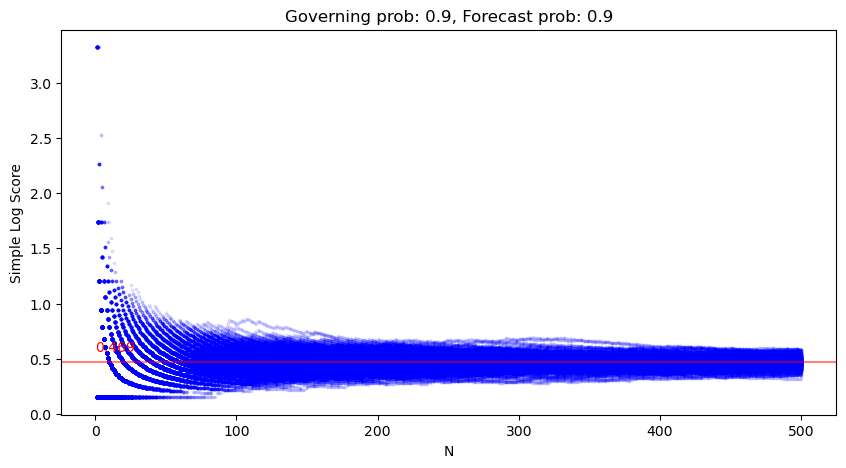

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]

# On top of that, plot faintly all the log score dots (df) individually, in a column for each N
for N in range(1, N+1):
    plt.scatter([N] * num_people, ss[N-1], color='blue', alpha=0.1, s=3)

xx = exp_ign(governing_prob, forecast_prob)
# Plot horizontal line at y = xx
plt.axhline(y=xx, color='r', linestyle='-', alpha = 0.5)
# Label that line with value xx and move it up a little bit
plt.text(0, xx + 0.1, f'{xx:.3f}', color='r')
# Title
plt.title(f'Governing prob: {governing_prob}, Forecast prob: {forecast_prob}')
# x-axis
plt.xlabel('N')
# y-axis
plt.ylabel('Simple Log Score')

In [14]:
# What's the frequency of the minimum number in each column of ss? Just the minimum number

min_freq = {}
for col in ss.columns:
    min_val = ss[col].min()
    freq = ss[col].value_counts()[min_val]
    min_freq[col] = freq

min_freq

{0: 453,
 1: 416,
 2: 363,
 3: 322,
 4: 292,
 5: 258,
 6: 241,
 7: 216,
 8: 197,
 9: 173,
 10: 152,
 11: 139,
 12: 128,
 13: 120,
 14: 110,
 15: 103,
 16: 91,
 17: 82,
 18: 77,
 19: 72,
 20: 66,
 21: 56,
 22: 51,
 23: 47,
 24: 43,
 25: 37,
 26: 33,
 27: 28,
 28: 24,
 29: 24,
 30: 23,
 31: 23,
 32: 19,
 33: 17,
 34: 15,
 35: 14,
 36: 14,
 37: 12,
 38: 12,
 39: 10,
 40: 9,
 41: 9,
 42: 8,
 43: 7,
 44: 6,
 45: 6,
 46: 5,
 47: 5,
 48: 5,
 49: 5,
 50: 4,
 51: 4,
 52: 3,
 53: 3,
 54: 3,
 55: 3,
 56: 3,
 57: 3,
 58: 3,
 59: 3,
 60: 3,
 61: 3,
 62: 3,
 63: 3,
 64: 3,
 65: 3,
 66: 3,
 67: 3,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 72: 2,
 73: 2,
 74: 2,
 75: 2,
 76: 2,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 3,
 90: 3,
 91: 3,
 92: 3,
 93: 3,
 94: 3,
 95: 3,
 96: 3,
 97: 2,
 98: 2,
 99: 2,
 100: 2,
 101: 2,
 102: 2,
 103: 2,
 104: 2,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 2,
 111: 2,
 112: 2,
 113: 2,
 114: 2,
 115: 2,
 116: 1,
 

In [15]:
min(ss[N-1])

0.3168391935200484

In [16]:
ss[N-1].value_counts().sort_index()

499
0.316839    1
0.348538    1
0.348538    1
0.354878    1
0.361218    1
           ..
0.576773    2
0.583113    1
0.583113    2
0.583113    1
0.589453    1
Name: count, Length: 279, dtype: int64

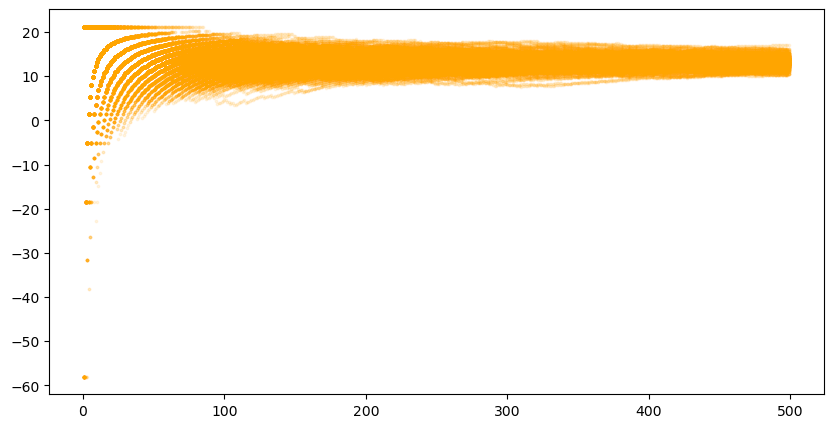

In [17]:
for N in range(1, N):
    plt.scatter([N] * num_people, ff[N-1], color='orange', alpha=0.1, s=3)

In [18]:
import numpy as np
from math import factorial

# Redefine the binomial_coefficient and simple_log_score functions
def binomial_coefficient(n, k):
    """Calculate the binomial coefficient 'n choose k'."""
    return factorial(n) // (factorial(k) * factorial(n - k))

def calculate_efficient_stats(total_games, actual_win_probability, forecast_probability, scoring_function, percentiles=[50]):
    # Initialize arrays for statistics
    mean_scores = []
    median_scores = []
    percentile_scores = {p: [] for p in percentiles}

    # Calculate scores for win and loss
    win_score = scoring_function(True, forecast_probability)
    loss_score = scoring_function(False, forecast_probability)

    for num_games in range(1, total_games + 1):
        # Compute probabilities for all possible numbers of wins
        probabilities = np.array([binomial_coefficient(num_games, wins) * (actual_win_probability ** wins) * ((1 - actual_win_probability) ** (num_games - wins)) 
                         for wins in range(num_games + 1)])

        # Compute the scores for all possible outcomes
        scores = np.array([(win_score * wins + loss_score * (num_games - wins)) / num_games for wins in range(num_games + 1)])

        # Calculate the mean, median and percentiles
        weighted_scores = scores * probabilities
        mean_scores.append(weighted_scores.sum() / probabilities.sum())
        scores_repeated = np.repeat(scores, (probabilities * 10000).astype(int))  # Approximation for median and percentiles
        median_scores.append(np.median(scores_repeated))
        for p in percentiles:
            percentile_scores[p].append(np.percentile(scores_repeated, p))

    return mean_scores, median_scores, percentile_scores

In [28]:
# Example with 10 games, win probability of 0.5, and the simple_log_score function
total_games = 1000

# Example calculation with 8th and 92nd percentiles
mean_scores, median_scores, percentile_scores = calculate_efficient_stats(total_games, governing_prob, forecast_prob, simple_log_score, [8, 92])

Text(0, 1.0444843438056282, '0.944')

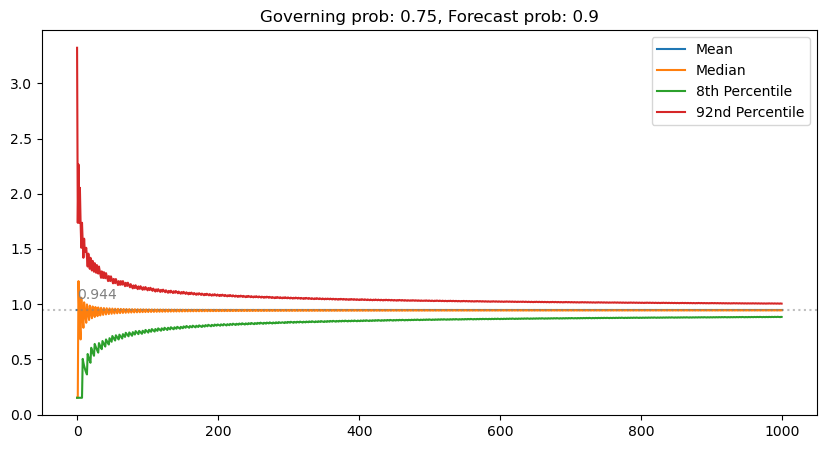

In [31]:
# Plot the series of means, medians, 8th and 92nd percentile scores. X axis is index. Y axis is score. All in one.
plt.plot(mean_scores, label='Mean')
plt.plot(median_scores, label='Median')
plt.plot(percentile_scores[8], label='8th Percentile')
plt.plot(percentile_scores[92], label='92nd Percentile')
# Show labels
plt.legend()
plt.title(f'Governing prob: {governing_prob}, Forecast prob: {forecast_prob}')

xx = exp_ign(governing_prob, forecast_prob)
# Plot horizontal line at y = xx
plt.axhline(y=xx, color='grey', linestyle='dotted', alpha = 0.5)
# Label that line with value xx and move it up a little bit
plt.text(0, xx + 0.1, f'{xx:.3f}', color='grey')

In [23]:
governing_prob = 0.90
forecast_prob = 0.96

mean_scores, median_scores, percentile_scores = calculate_efficient_stats(total_games, governing_prob, forecast_prob, simple_log_score, [8, 92])

In [30]:
governing_prob = 0.75
forecast_prob = 0.90

mean_scores, median_scores, percentile_scores = calculate_efficient_stats(total_games, governing_prob, forecast_prob, simple_log_score, [8, 92])

In [41]:
def generate_combinatorics_average_score_table(total_games, forecast_probability, scoring_function):
    table = []

    # Calculate individual game scores for win and loss based on the forecast probability
    win_score = scoring_function(True, forecast_probability)
    loss_score = scoring_function(False, forecast_probability)

    for wins in range(total_games + 1):
        losses = total_games - wins
        ways = binomial_coefficient(total_games, wins)

        # Average score for this outcome (wins and losses)
        average_score = (wins * win_score + losses * loss_score) / total_games

        table.append({"Wins": wins, "Losses": losses, "Ways": ways, f"Average Score given {forecast_probability}": average_score})

    return table

# Generate combinatorics average score table for 10 games with a forecast probability of 90%
mytable = generate_combinatorics_average_score_table(40, forecast_prob, simple_log_score)
mytable

[{'Wins': 0,
  'Losses': 40,
  'Ways': 1,
  'Average Score given 0.9': 3.3219280948873626},
 {'Wins': 1,
  'Losses': 39,
  'Ways': 40,
  'Average Score given 0.9': 3.2426799698513045},
 {'Wins': 2,
  'Losses': 38,
  'Ways': 780,
  'Average Score given 0.9': 3.163431844815247},
 {'Wins': 3,
  'Losses': 37,
  'Ways': 9880,
  'Average Score given 0.9': 3.0841837197791895},
 {'Wins': 4,
  'Losses': 36,
  'Ways': 91390,
  'Average Score given 0.9': 3.0049355947431313},
 {'Wins': 5,
  'Losses': 35,
  'Ways': 658008,
  'Average Score given 0.9': 2.9256874697070736},
 {'Wins': 6,
  'Losses': 34,
  'Ways': 3838380,
  'Average Score given 0.9': 2.846439344671016},
 {'Wins': 7,
  'Losses': 33,
  'Ways': 18643560,
  'Average Score given 0.9': 2.767191219634958},
 {'Wins': 8,
  'Losses': 32,
  'Ways': 76904685,
  'Average Score given 0.9': 2.6879430945989},
 {'Wins': 9,
  'Losses': 31,
  'Ways': 273438880,
  'Average Score given 0.9': 2.608694969562842},
 {'Wins': 10,
  'Losses': 30,
  'Ways': 8476

In [40]:
# Save that table to a csv please
pd.DataFrame(mytable).to_csv('combinatorics_and_scores_90_table.csv', index=False)